In [1]:
import torch
import torch.nn as nn  # Neural network module
import matplotlib.pyplot as plt  # For plotting

In [2]:
torch.manual_seed(71)  # For reproducibility

# X values (100 points between 0 and 1)
X = torch.linspace(0, 1, 100).reshape(-1, 1)

# y = 3x + 2 + noise
y = 3 * X + 2 + 0.1 * torch.randn(X.size())


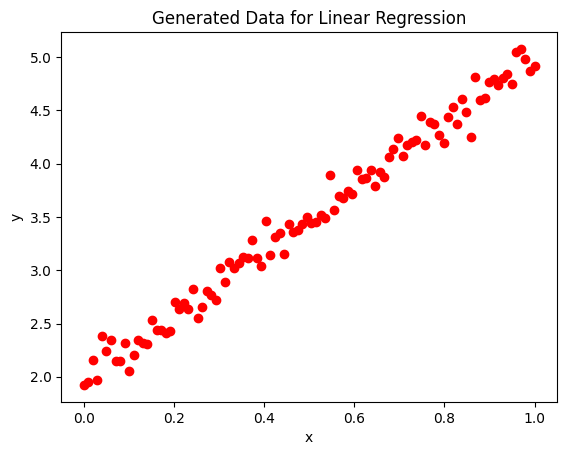

In [3]:
# Plot the original data
plt.scatter(X, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

In [4]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.linear(x)


In [5]:
# Initialize the Model
torch.manual_seed(59)  # Ensure same initial weights
model = Model(1, 1)

In [6]:
# Print Initial Weights and Bias
initial_weight = model.linear.weight.item()
initial_bias = model.linear.bias.item()
print("\nName: ")
print("Register No: ")
print(f'Initial Weight: {initial_weight:.8f}, Initial Bias: {initial_bias:.8f}\n')


Name: 
Register No: 
Initial Weight: 0.10597813, Initial Bias: 0.96379614



In [7]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [8]:
epochs = 100
losses = []

for epoch in range(1, epochs + 1):

    # Forward pass
    y_pred = model(X)
    loss = loss_function(y_pred, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    print(f"epoch: {epoch:2} "
          f"loss: {loss.item():10.8f} "
          f"weight: {model.linear.weight.item():10.8f} "
          f"bias: {model.linear.bias.item():10.8f}")


epoch:  1 loss: 6.85567284 weight: 0.40303430 bias: 1.45840216
epoch:  2 loss: 3.94802237 weight: 0.63072616 bias: 1.82438135
epoch:  3 loss: 2.32481861 weight: 0.80656397 bias: 2.09439540
epoch:  4 loss: 1.41729796 weight: 0.94361860 bias: 2.29282284
epoch:  5 loss: 0.90858519 weight: 1.05164742 bias: 2.43785954
epoch:  6 loss: 0.62214035 weight: 1.13793421 bias: 2.54308581
epoch:  7 loss: 0.45960695 weight: 1.20791686 bias: 2.61863828
epoch:  8 loss: 0.36618578 weight: 1.26565528 bias: 2.67208195
epoch:  9 loss: 0.31134516 weight: 1.31418061 bias: 2.70906305
epoch: 10 loss: 0.27807307 weight: 1.35575652 bias: 2.73379540
epoch: 11 loss: 0.25688967 weight: 1.39207339 bias: 2.74942374
epoch: 12 loss: 0.24251175 weight: 1.42439413 bias: 2.75829458
epoch: 13 loss: 0.23199390 weight: 1.45366216 bias: 2.76215935
epoch: 14 loss: 0.22369342 weight: 1.48058271 bias: 2.76232433
epoch: 15 loss: 0.21669325 weight: 1.50568295 bias: 2.75976419
epoch: 16 loss: 0.21048084 weight: 1.52935743 bias: 2.7

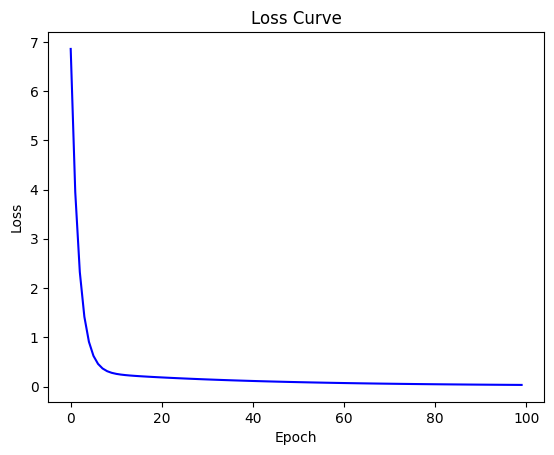

In [9]:
# Plot Loss Curve
plt.plot(range(epochs), losses, color='blue')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss Curve')
plt.show()

In [10]:
# Final Weights & Bias
final_weight = model.linear.weight.item()
final_bias = model.linear.bias.item()
print("\nName: ")
print("Register No: ")
print(f'\nFinal Weight: {final_weight:.8f}, Final Bias: {final_bias:.8f}')


Name: 
Register No: 

Final Weight: 2.55180550, Final Bias: 2.23116970


In [11]:
#  Best-Fit Line Calculation
x1 = torch.tensor([X.min().item(), X.max().item()]) # Find min and max values of X
y1 = x1 * final_weight + final_bias # Compute corresponding y-values using trained model

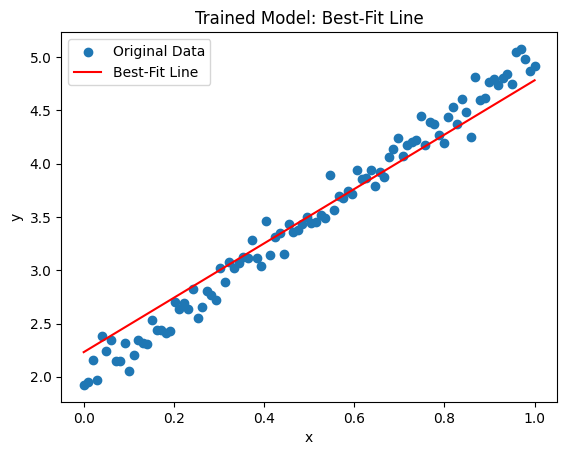

In [12]:
# Plot Original Data & Best-Fit Line
plt.scatter(X, y, label="Original Data")
plt.plot(x1, y1, 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()

In [13]:
# Prediction for x = 120
x_new = torch.tensor([[120.0]])  # New input as a tensor
y_new_pred = model(x_new).item()  # Predict using trained model
print("\nName: ")
print("Register No: ")
print(f"\nPrediction for x = 120: {y_new_pred:.8f}")


Name: 
Register No: 

Prediction for x = 120: 308.44784546
